# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product promotions.For that they collected data and decided to carry out a study on it.

   * The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
   * The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('Sales_add.csv')

In [3]:
#descriptive analytics on the dataset
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.shape

(22, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
# Checking null values
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [8]:
data.skew()

Sales_before_digital_add(in $)    0.578033
Sales_After_digital_add(in $)    -0.022669
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x36983ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x369853490>,
 'boxes': [<matplotlib.lines.Line2D at 0x36983aa30>],
 'medians': [<matplotlib.lines.Line2D at 0x369853b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x369853eb0>],
 'means': []}

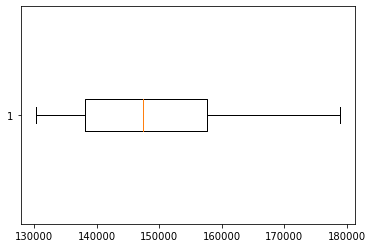

In [9]:
plt.boxplot(data['Sales_before_digital_add(in $)'],vert=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x36a8f2d60>,
 'caps': [<matplotlib.lines.Line2D at 0x36a901460>,
 'boxes': [<matplotlib.lines.Line2D at 0x36a8f2a00>],
 'medians': [<matplotlib.lines.Line2D at 0x36a901b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x36a901e80>],
 'means': []}

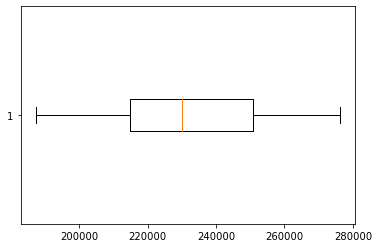

In [10]:
plt.boxplot(data['Sales_After_digital_add(in $)'],vert=0)

In [11]:
data.corr()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Sales_before_digital_add(in $),1.000000,-0.178668
Sales_After_digital_add(in $),-0.178668,1.000000


INSIGHTS:

   * Correlation b/w sales before and after digital add is very low
   * Sales before digital add is positively skewed
   * Sales after digital add is slightly negatively skewed

### The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

Let,

   * Null hypothesis(H0) :- There is no increase in sales after stepping into digital marketing.
   * Alternative hypothesis(H1) :- There is an increase in sales after stepping into digital marketing.

significance level as alpha =0.05

   * if p value <0.05,we reject Null hypothesis and accept Alternative hypothesis.
   * if p value >0.05, we can accept null hypothesis and reject Alternative hypothesis.


In [12]:
#calculating p -value using t-test-paired t-test-METHOD 1
from scipy import stats
ttest,pvalue=stats.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],alternative="less")
print(pvalue)
print("p value:",round(pvalue))

# comparing p-value with significant level 0.05
if pvalue<0.05:
    print("Reject null hypothesis(H0)-i.e, There is an increase in sales after stepping into digital marketing.")
else:
    print("Accept null hypothesis(H0)-i.e, There is no increase in sales after stepping into digital marketing.")

3.168333502287889e-11
p value: 0
Reject null hypothesis(H0)-i.e, There is an increase in sales after stepping into digital marketing.


In [13]:
#Calculating p- value using z test-METHOD-2
from statsmodels.stats import weightstats as stests
ztest,pvalue=stests.ztest(data['Sales_before_digital_add(in $)'],x2=None,value=156)
print('p value:',round(pvalue))

# comparing p value with significant level 0.05
if pvalue<0.05:
    print("Reject null hypothesis(H0)-i.e, There is an increase in sales after stepping into digital marketing.")
else:
    print("Accept null hypothesis(H0)-i.e, There is no increase in sales after stepping into digital marketing.")

p value: 0
Reject null hypothesis(H0)-i.e, There is an increase in sales after stepping into digital marketing.


INSIGHTS:

   * p value is less than significance level(0.05), so we can reject null hypothesis.
   * We can conclude that there is an increase in sales after stepping into digital marketing.



### The company needs to check whether there is any dependency between the features “Region” and “Manager".

Let,

   * Null hypothesis(H0) :- Region and Manager are independent.
   * Alternative hypothesis(H1) :- Region and Manager are dependent.

Checking chi-squared independency between region and manager

In [14]:
data['Manager'].unique()

array(['Manager - A', 'Manager - C', 'Manager - B'], dtype=object)

In [15]:
data['Region'].unique()

array(['Region - A', 'Region - B', 'Region - C'], dtype=object)

In [16]:
#Defining a dictionary
Managernumber={'Manager - A':1, 'Manager - B':2, 'Manager - C':3}
regionnumber={'Region - A':1, 'Region - B':2, 'Region - C':3}

In [17]:
man_num=[Managernumber[values] for values in data.Manager]
man_num

[1, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3]

In [18]:
reg_num=[regionnumber[value] for value in data.Region]
reg_num

[1, 1, 2, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1]

In [19]:
#create a dataframe using the list man_num and reg_num
data_1=pd.DataFrame(list(zip(man_num,reg_num)),columns=['man_num','reg_num'])
data_1.head()

,man_num,reg_num
0,1,1
1,3,1
2,1,2
3,2,2
4,2,3


In [20]:
#Calculating p- value using chi-Squared test-METHOD 1
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency(data_1)
print('stat=%.3f, p=%.3f' % (stat,p))

# comparing p value with significant level 0.05
if p<0.05: 
    print('The features “Region” and “Manager" are dependent')
else:
    print('The features “Region” and “Manager" are independent')

stat=7.288, p=0.998
The features “Region” and “Manager" are independent


In [21]:
#contigency table between region and manager-METHOD 2
data_2=pd.crosstab(data.Region,data.Manager)
data_2

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [22]:
from scipy.stats import chi2_contingency
chi,p,dof,expected=chi2_contingency(data_2)

In [23]:
print('chi-square value: ',chi)
print('degree of fredom: ',dof)
print('p value: ',p)
print('expected output: ',expected)

chi-square value:  3.050566893424036
degree of fredom:  4
p value:  0.5493991051158094
expected output:  [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [24]:
#comparing p value with significant level 0.05
if p<0.05: 
    print('The features “Region” and “Manager" are dependent')
else:
    print('The features “Region” and “Manager" are independent')

The features “Region” and “Manager" are independent
